In [368]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set(style="whitegrid")
#pd.set_option('display.float_format', '{:.2f}'.format)

In [369]:
df = pd.read_csv('dataTP1.csv')

In [370]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16499 entries, 0 to 16498
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16499 non-null  int64  
 1   Region                              16499 non-null  object 
 2   Territory                           16499 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16499 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16499 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16499 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16499 non-null  int64  
 7   Submitted_for_Approval              16499 non-null  int64  
 8   Bureaucratic_Code                   16499 non-null  object 
 9   Account_Created_Date                16499 non-null  object 
 10  Source                              16499 non-null  object 
 11  Billing_Country                     16499

###### Ojo ID es el id del cada registro (osea de cada fila que es único por fila), que no es igual a Opportunity_ID (ID de la oportunidad), ya que puedo tener varios registros (filas) para una misma oportunidad.

In [372]:
df['Submitted_for_Approval'].value_counts()

0    16499
Name: Submitted_for_Approval, dtype: int64

In [373]:
df.head()

ID   Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  27761   Europa        None                                   1   
1  27760   Europa        None                                   0   
2  27446  América  NW America                                   0   
3  16808  América  NW America                                   1   
4  16805  América  NW America                                   1   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                                 1                             1   
1                                 0                             0   
2                                 0                             0   
3                                 0                             1   
4                                 0                             1   

   Bureaucratic_Code_0_Approved  Submitted_for_Approval    Bureaucratic_Code  \
0                             1                       0  Bureaucratic_Code_4   
1                             0                       0  Bureaucratic_Code_4   
2                             0                       0  Bureaucratic_Code_4   
3                             0                       0  Bureaucratic_Code_5   
4                             0                       0  Bureaucratic_Code_5   

  Account_Created_Date  ... Actual_Delivery_Date TRF Total_Amount_Currency  \
0            6/16/2015  ...                  NaT  10                   EUR   
1            6/16/2015  ...                  NaT   0                   EUR   
2            4/21/2015  ...                  NaT   0                   USD   
3            7/27/2013  ...                  NaT  14                   USD   
4            7/27/2013  ...                  NaT  25                   USD   

  Total_Amount  Total_Taxable_Amount_Currency Total_Taxable_Amount  \
0   5272800.00                            EUR           5272800.00   
1     48230.00                            EUR             48230.00   
2     83865.60                            USD             83865.60   
3   7421881.50                            USD           7421881.50   
4  13357192.50                            USD          13357192.50   

         Stage       Prod_Category_A        Hemisferio Estación  
0  Closed Lost  Prod_Category_A_None              None      NaN  
1   Closed Won  Prod_Category_A_None              None      NaN  
2   Closed Won  Prod_Category_A_None  Hemisferio Norte    Otoño  
3  Closed Lost  Prod_Category_A_None  Hemisferio Norte    Otoño  
4  Closed Lost  Prod_Category_A_None  Hemisferio Norte    Otoño  

[5 rows x 54 columns]

In [409]:
df['Opportunity_Created_Date']=pd.to_datetime(df['Opportunity_Created_Date'])

## 1. Stage

* #### Stage es nuestra variable target, variable que nos indica el estado de la oportunidad, o sea si la oportunidad resultó en éxito o no (closed won o closed lost respectivamente).

In [374]:
# Veamos sus valores únicos y cantidades
df['Stage'].value_counts()

Closed Won       9300
Closed Lost      7135
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

* Se observa en dicha variable que, además de los estados que indican si una oportunidad resultó exitosa o no (**estados finales**), tenemos otros 3 estados (Proposal, Negotiation y Qualification) que corresponden a **estados intermedios** que tienen las oportunidades dentro del pipeline que desarrolla la empresa.

* Como con esta variable se estará luego tratando de predecir la “Probabilidad de éxito” para cada oportunidad, o sea ¿Cuál es la probabilidad de que la oportunidad se convierta en un caso Closed Won? .Que decisión debemos tomar con dichos estados? Dichos estados al no tener una resolución, debemos asignarle arbitrariamente algún estado final? Debemos filtrar estos casos?

> Luego de analizar esos registros con estados intermedios y verificar que corresponen a oportunidades que no tuvieron aún en desenlase exitoso o no y tenindo en cuenta que corresponden a unos pocos casos, tomamos la decisión de filtrar estos registros y quedarnos solamente con los que tienen un estado final definido.

* (En la mayoría de los casos exitosos la fecha de ultima modificación de la oportunidad es menor a la fecha de expiración del presupuesto(esa modificación fue para colocar el estado en exitoso?). Hay algunos casos en los que la fecha de ultima modificación es menor a la fecha de expiración del presupuesto pero con pocos días de distancia y fueron declarados como no exitosos)

In [375]:
df = df.loc[(df['Stage']!='Proposal') & (df['Stage']!='Negotiation') & (df['Stage']!='Qualification'),:]

#### En nuestro set de datos: ¿Cuántas oportunidades resultaron exitosas y cuantas no lo fueron?

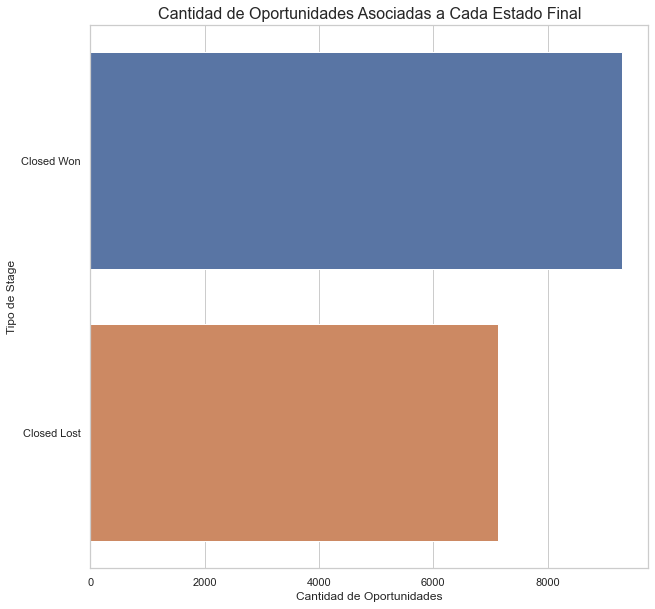

In [376]:
target = df['Stage'].value_counts()
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index)
grafico_top_key.set_title("Cantidad de Oportunidades Asociadas a Cada Estado Final",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=12)
grafico_top_key.set_ylabel("Tipo de Stage",fontsize=12);

## 2. Región:

#### ¿Cuántas rigiones distintas tenemos en nuestro set de datos y como se distribuyen las cantidasdes de Oportunidades en las mismas?

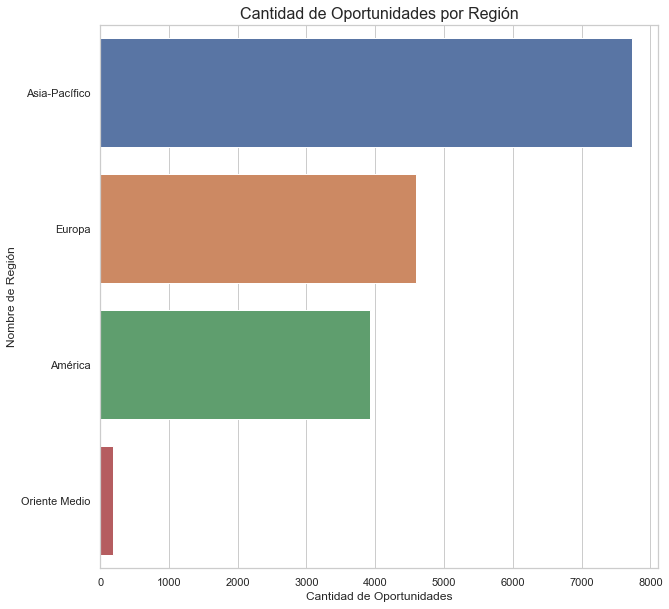

In [377]:
target = df['Region'].value_counts()
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index)
grafico_top_key.set_title("Cantidad de Oportunidades por Región",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=12)
grafico_top_key.set_ylabel("Nombre de Región",fontsize=12);

#### ¿Cómo se distribuyen las oportunidades exitosas y no exitosas según las distintas Regiones?

In [378]:
df['veces'] = 1
mi_map=pd.crosstab(df['Region'], df['Stage'],values=df.veces,aggfunc=np.sum)

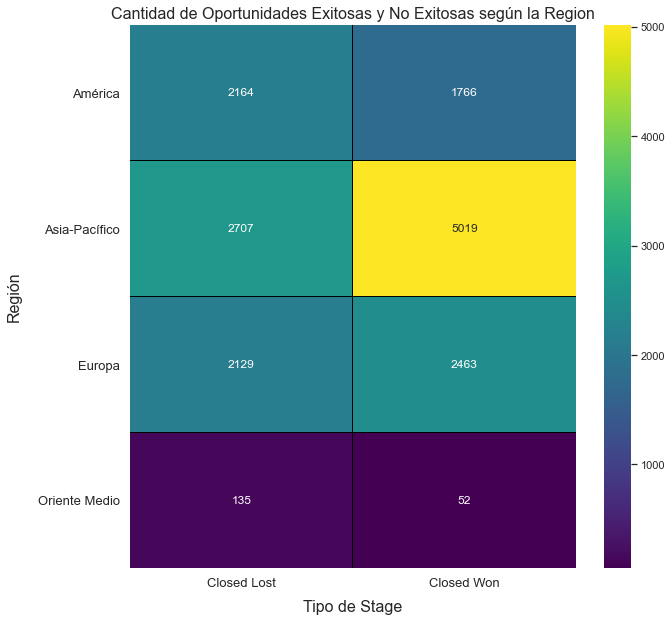

In [379]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True,fmt='g')
g.set_title("Cantidad de Oportunidades Exitosas y No Exitosas según la Region", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Región", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

#### ¿Cómo es la evolución anual de la cantidad de Oportunidades según la Región?

In [414]:
df['Año_Oportunidad']=df['Opportunity_Created_Date'].dt.year

In [412]:
df['Opportunity_Created_Date'].nlargest(3)

15653   2018-12-29
15654   2018-12-29
15655   2018-12-29
Name: Opportunity_Created_Date, dtype: datetime64[ns]

In [413]:
df['Opportunity_Created_Date'].nsmallest(3)

15656   2013-11-05
15657   2014-03-21
15658   2014-03-28
Name: Opportunity_Created_Date, dtype: datetime64[ns]

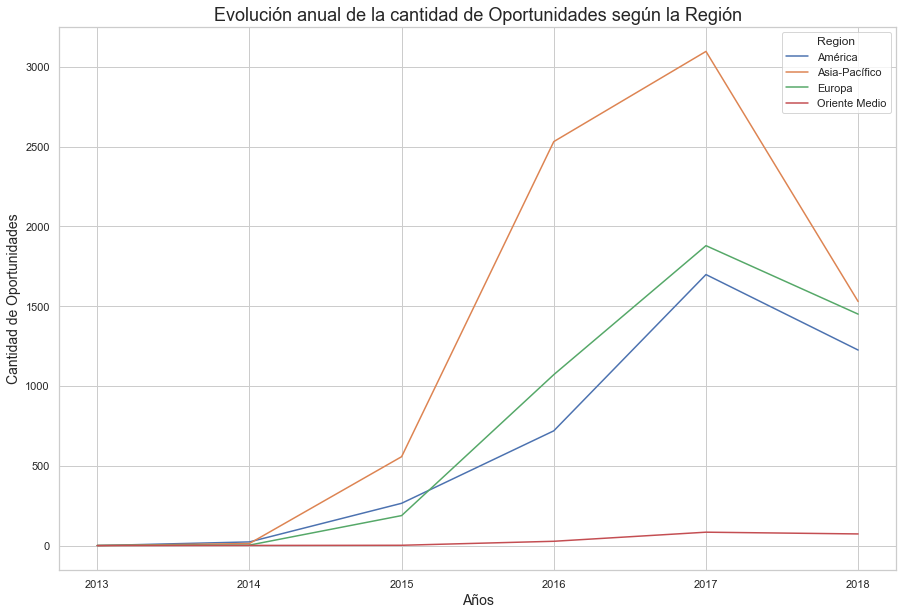

In [422]:
grafico=pd.crosstab(df['Año_Oportunidad'],df['Region']).plot(figsize=(15,10));
grafico.set_title("Evolución anual de la cantidad de Oportunidades según la Región",fontsize=18)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

## 3. Hemisferio

#### ¿Cómo se distribuyen las oportunidades exitosas y no exitosas según los distintas Hemisferios?

In [380]:
# Filtro primeramente los valores correspondiente a los 2 Hemisferios con los que cuento información(filtro casos nulos)
Hemisferios = df.loc[df['Hemisferio']!='None',:]

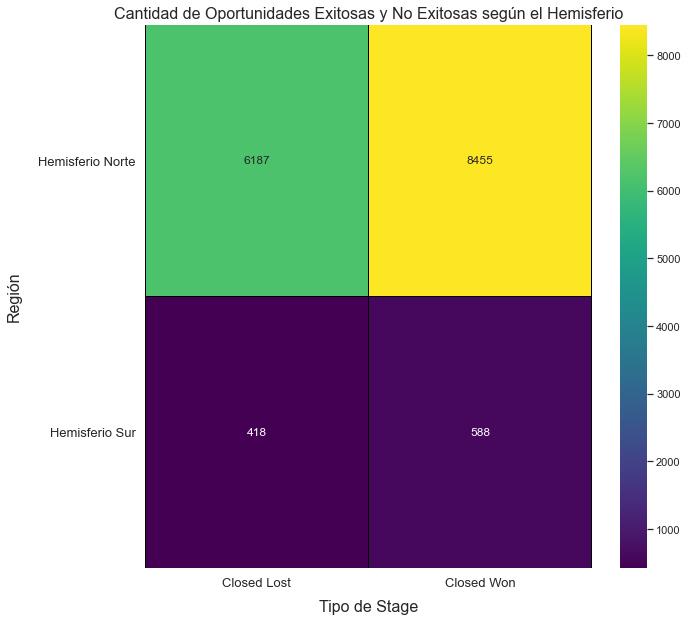

In [381]:
df['veces'] = 1
mi_map=pd.crosstab(Hemisferios['Hemisferio'], Hemisferios['Stage'],values=df.veces,aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True,fmt='g')
g.set_title("Cantidad de Oportunidades Exitosas y No Exitosas según el Hemisferio", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Región", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

## 4. Territorios

#### Territorios más populares por Región

In [553]:
df_territorio=df[['Territory','Stage','Region']].copy()
df_territorio['veces'] = 1
df_territorio = df_territorio.loc[df_territorio['Territory']!='None',:]
america = df_territorio.loc[df_territorio['Region']=='América',['Territory']]
europa = df.loc[df['Region']=='Europa',['Territory']]
oriente_medio = df.loc[df['Region']=='Oriente Medio',['Territory']]
asia_pacifico = df.loc[df['Region']=='Asia-Pacífico',['Territory']]

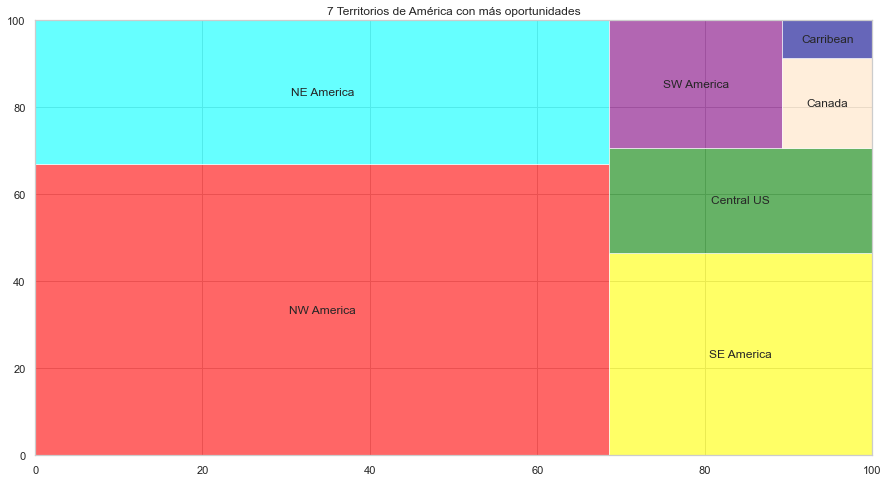

In [554]:
territorios = america['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de América con más oportunidades');

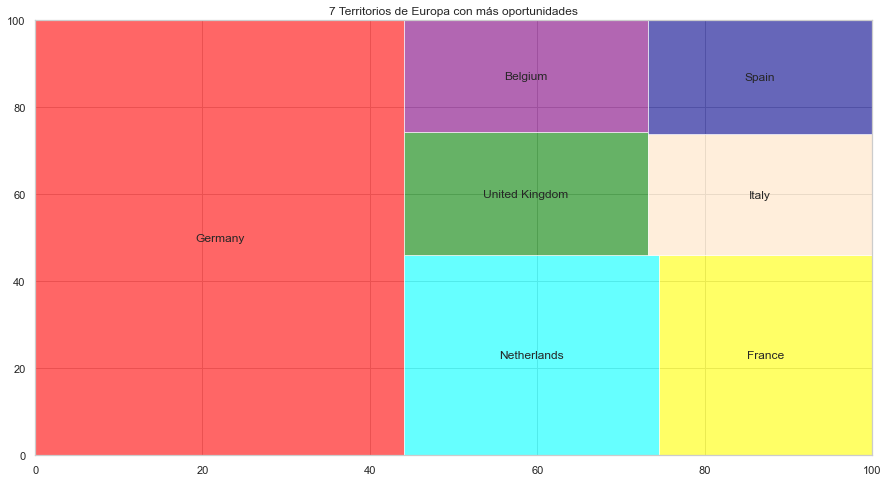

In [555]:
territorios = europa['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de Europa con más oportunidades');

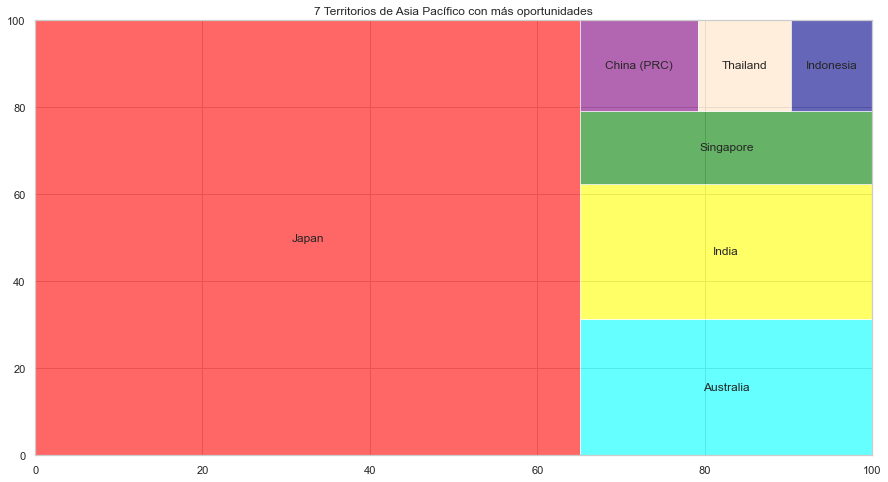

In [556]:
territorios = asia_pacifico['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de Asia Pacífico con más oportunidades');

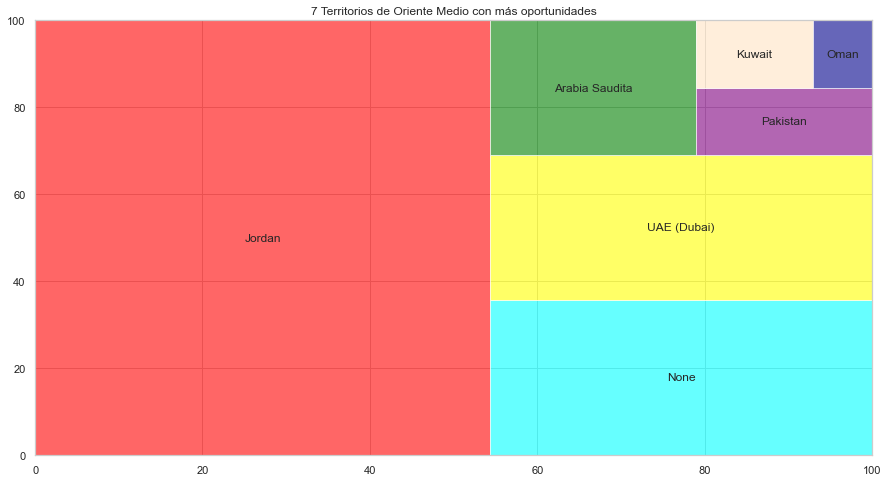

In [557]:
territorios = oriente_medio['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de Oriente Medio con más oportunidades');

#### Top 7 Territorios más populares y sus correspondientes cantidades de Oportunidades

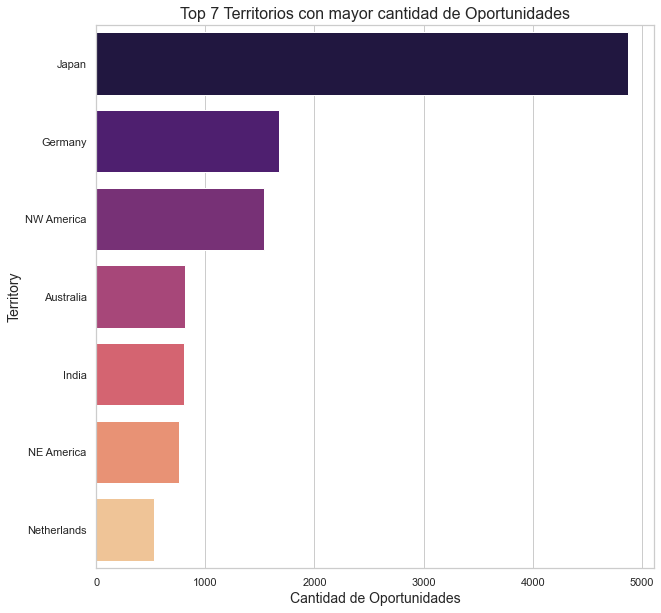

In [558]:
target = df_territorio['Territory'].value_counts().nlargest(7)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 7 Territorios con mayor cantidad de Oportunidades",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=14)
grafico_top_key.set_ylabel("Territory",fontsize=14);

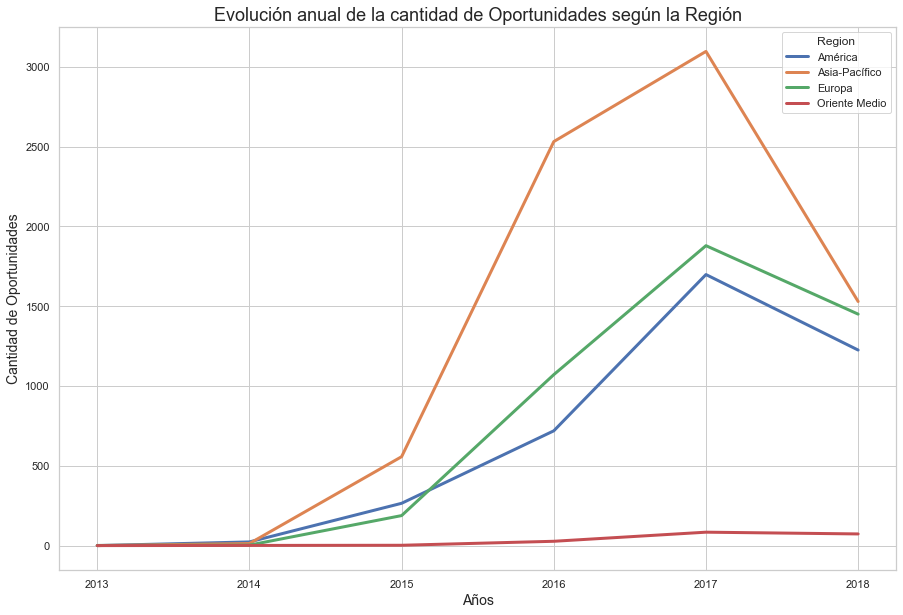

In [559]:
grafico=pd.crosstab(df['Año_Oportunidad'],df['Region']).plot(figsize=(15,10),linewidth=3);
grafico.set_title("Evolución anual de la cantidad de Oportunidades según la Región",fontsize=18)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

#### Para los 7 Territorios con mayor cantidad de Oportunidades. ¿Cuantas de ellas son Exitosas y No Exitosas?

In [560]:
 mis_territorios = pd.pivot_table(df_territorio, values='veces', index=['Territory'],columns=['Stage'], aggfunc=np.sum, fill_value=0).reset_index()

In [561]:
target = df_territorio['Territory'].value_counts().nlargest(7)
target= target.reset_index()
target.rename(columns={'index':'Territory','Territory':'Cantidad'},inplace=True)
target

Territory  Cantidad
0        Japan      4867
1      Germany      1678
2   NW America      1535
3    Australia       816
4        India       807
5   NE America       759
6  Netherlands       532

In [562]:
top7_territorios = pd.merge(target,mis_territorios,on='Territory')
top7_territorios.set_index('Territory',inplace=True)
top7_territorios.drop('Cantidad',axis='columns', inplace=True)
top7_territorios

Closed Lost  Closed Won
Territory                           
Japan               1546        3321
Germany              659        1019
NW America           587         948
Australia            306         510
India                433         374
NE America           501         258
Netherlands          275         257

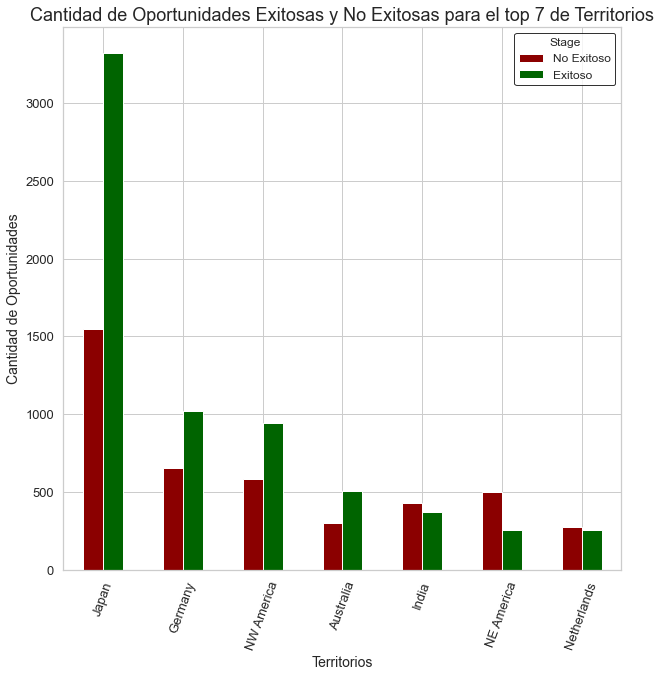

In [563]:
grafico=top7_territorios.plot(kind='bar',color=['darkred','darkgreen'],fontsize=13,figsize=(10,10),rot=70)
grafico.set_title("Cantidad de Oportunidades Exitosas y No Exitosas para el top 7 de Territorios",fontsize=18)
grafico.set_xlabel("Territorios",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14)
leyenda=plt.legend(['No Exitoso','Exitoso'],fontsize=12,title='Stage',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

* Es este gráfico se aprecia que, dentro del Tpo 7, solo los cuatro primeros Territorios con mayor cantidad de oportunidades presentan una mayor cantidad de casos Exitosos que no Exitosos. Destacandose Japón con una cantidad de casos Exitosos de más del doble que no Exitosos.

* Si prestamos atención un poco más al gráfico nos damos cuenta de que, si quisiéramos listar por ejemplo los tres países (en cantidad de Oportunidades) más exitosos, estos serían: Japan, Germany y NW América. Igualmente si quisiéramos listar Los tres países menos Exitosos (en cantidad de Oportunidades) nuevamente éstos serían: Japan, Germany y NW América. Esto pasa porque estamos analizando cantidades absolutas, con lo cual, para poder sacar mejores conclusiones sobre dichos Territorios sería más conveniente realizar un análisis proporcional (relativo) que contemple por ejemplo la cantidad de casos Exitosos sobre el total de casos para cada Territorio y luego sí listar esos 7 Territorios con mejor Ratio.

In [564]:
territorio_oprtunidades = pd.pivot_table(df_territorio, values='veces', index=['Territory'],columns=['Stage'], aggfunc=np.sum, fill_value=0).reset_index()
territorio_oprtunidades=territorio_oprtunidades.fillna(0)
territorio_oprtunidades['Total_Oportunidades'] = territorio_oprtunidades['Closed Lost']+ territorio_oprtunidades['Closed Won']
territorio_oprtunidades['Ratio_Oportunidades_exitosas'] = territorio_oprtunidades['Closed Won']/territorio_oprtunidades['Total_Oportunidades']
territorio_oprtunidades.head()

Stage       Territory  Closed Lost  Closed Won  Total_Oportunidades  \
0             Albania            2           0                    2   
1      Arabia Saudita            7           7                   14   
2             Armenia            2           0                    2   
3           Australia          306         510                  816   
4             Austria           21         123                  144   

Stage  Ratio_Oportunidades_exitosas  
0                              0.00  
1                              0.50  
2                              0.00  
3                              0.62  
4                              0.85

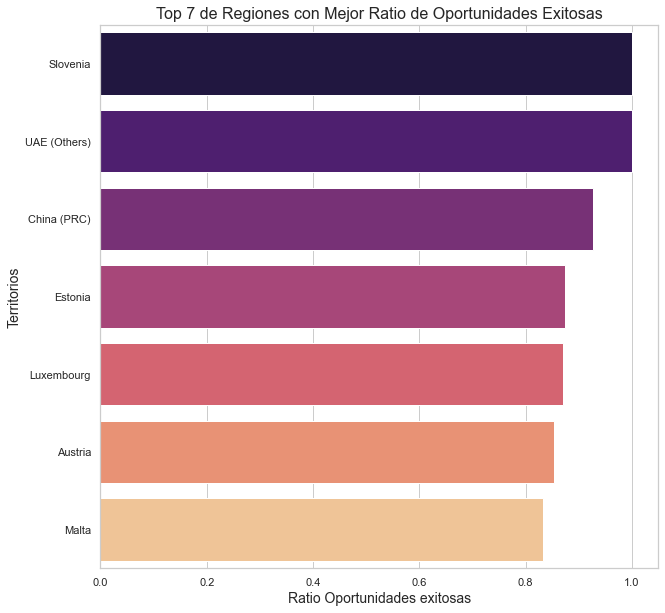

In [565]:
target = territorio_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Territory,palette="magma")
grafico_top_key.set_title("Top 7 de Regiones con Mejor Ratio de Oportunidades Exitosas",fontsize=16)
grafico_top_key.set_xlabel("Ratio Oportunidades exitosas",fontsize=14)
grafico_top_key.set_ylabel("Territorios",fontsize=14);

* Además para que este análisis no caiga en el problema de la ecuación más paligrosa del mundo, debemos tomar ciertas restricciones, como por ejemplo que en ese Top 7 de mejores Ratios tengamos Territorios con una cantidad de Oportunidades mayor al 1,5% del Total de Oportunidades que presenta la empresa.

In [512]:
territorio_oprtunidades.Total_Oportunidades.sum()*0.015

234.72

* Ahora  filtramos los casos bajo las restricciones pedidas

In [513]:
territorio_oprtunidades=territorio_oprtunidades.loc[territorio_oprtunidades['Total_Oportunidades']>235]

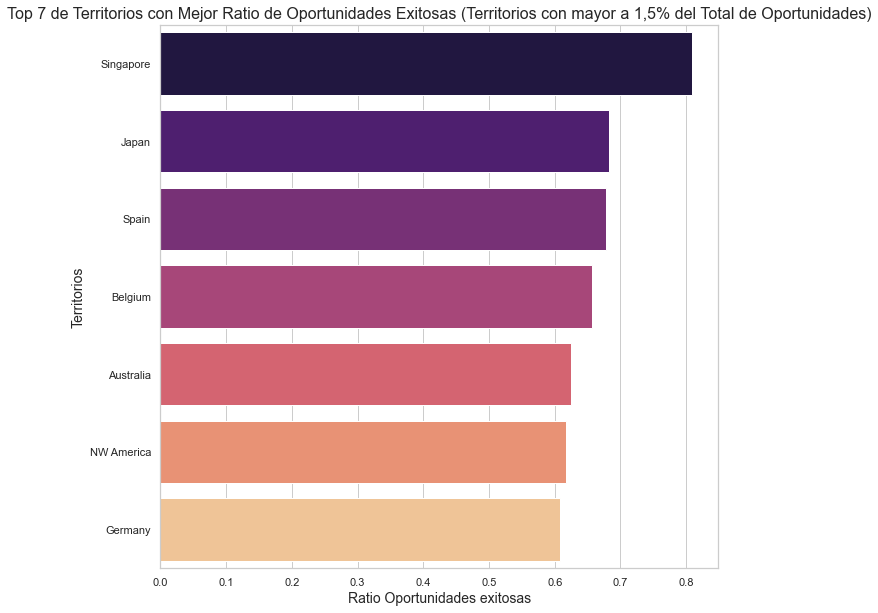

In [514]:
target = territorio_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Territory,palette="magma")
grafico_top_key.set_title("Top 7 de Territorios con Mejor Ratio de Oportunidades Exitosas (Territorios con mayor a 1,5% del Total de Oportunidades)",fontsize=16)
grafico_top_key.set_xlabel("Ratio Oportunidades exitosas",fontsize=14)
grafico_top_key.set_ylabel("Territorios",fontsize=14);

* (Analizar)

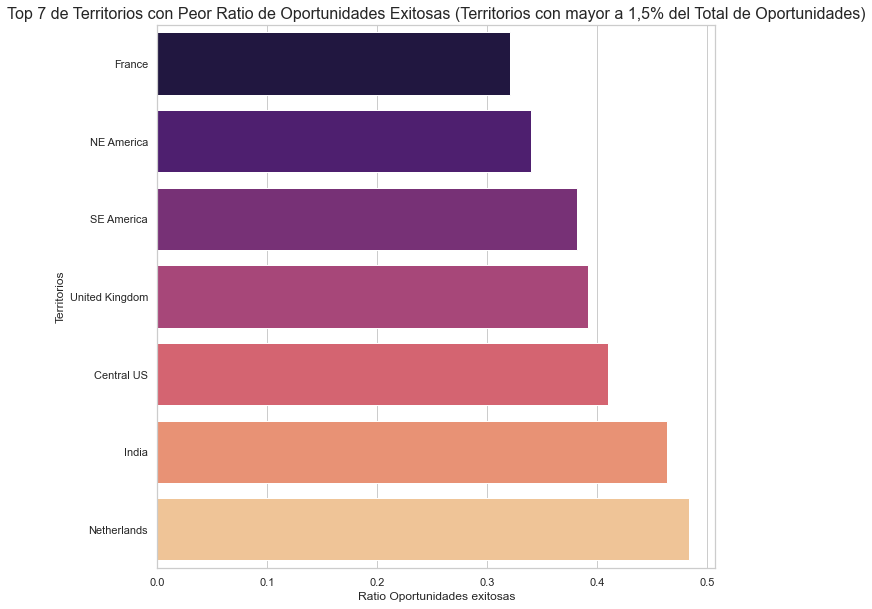

In [515]:
target = territorio_oprtunidades.nsmallest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Territory,palette="magma")
grafico_top_key.set_title("Top 7 de Territorios con Peor Ratio de Oportunidades Exitosas (Territorios con mayor a 1,5% del Total de Oportunidades)",fontsize=16)
grafico_top_key.set_xlabel("Ratio Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Territorios",fontsize=12);

#### Los 7 Territorios con mejor Ratio, como fue su evolución anual?

* Los 7 Territorios con mejor Ratio y su evolución en cantidad de Oportunidades

In [516]:
target = territorio_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
#target= target.reset_index()
#target.rename(columns={'index':'Territory','Territory':'Cantidad'},inplace=True)
target

Stage   Territory  Closed Lost  Closed Won  Total_Oportunidades  \
55      Singapore           84         355                  439   
31          Japan         1546        3321                 4867   
61          Spain           86         181                  267   
6         Belgium           98         187                  285   
3       Australia          306         510                  816   
43     NW America          587         948                 1535   
24        Germany          659        1019                 1678   

Stage  Ratio_Oportunidades_exitosas  
55                             0.81  
31                             0.68  
61                             0.68  
6                              0.66  
3                              0.62  
43                             0.62  
24                             0.61

In [517]:
territorio_year = df[['Territory','Año_Oportunidad','Stage']]

In [518]:
top7_territorios=pd.merge(target,territorio_year,on='Territory',how='inner')
top7_territorios['veces']=1

In [519]:
pd.pivot_table(top7_territorios, values='veces', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0)

Territory        Australia  Belgium  Germany  Japan  NW America  Singapore  \
Año_Oportunidad                                                              
2014                     0        0        1      0          16          0   
2015                     8        1       39    489         132          2   
2016                   153       37      270   1846         245        109   
2017                   488      146      709   1763         641        167   
2018                   167      101      659    769         501        161   

Territory        Spain  
Año_Oportunidad         
2014                 0  
2015                 6  
2016                65  
2017               132  
2018                64

In [520]:
top7_territorios.groupby(['Año_Oportunidad','Territory'], as_index=False)['Ratio_Oportunidades_exitosas'].mean()

Año_Oportunidad   Territory  Ratio_Oportunidades_exitosas
0              2014     Germany                          0.61
1              2014  NW America                          0.62
2              2015   Australia                          0.62
3              2015     Belgium                          0.66
4              2015     Germany                          0.61
5              2015       Japan                          0.68
6              2015  NW America                          0.62
7              2015   Singapore                          0.81
8              2015       Spain                          0.68
9              2016   Australia                          0.62
10             2016     Belgium                          0.66
11             2016     Germany                          0.61
12             2016       Japan                          0.68
13             2016  NW America                          0.62
14             2016   Singapore                          0.81
15             2016       Spain                          0.68
16             2017   Australia                          0.62
17             2017     Belgium                          0.66
18             2017     Germany                          0.61
19             2017       Japan                          0.68
20             2017  NW America                          0.62
21             2017   Singapore                          0.81
22             2017       Spain                          0.68
23             2018   Australia                          0.62
24             2018     Belgium                          0.66
25             2018     Germany                          0.61
26             2018       Japan                          0.68
27             2018  NW America                          0.62
28             2018   Singapore                          0.81
29             2018       Spain                          0.68

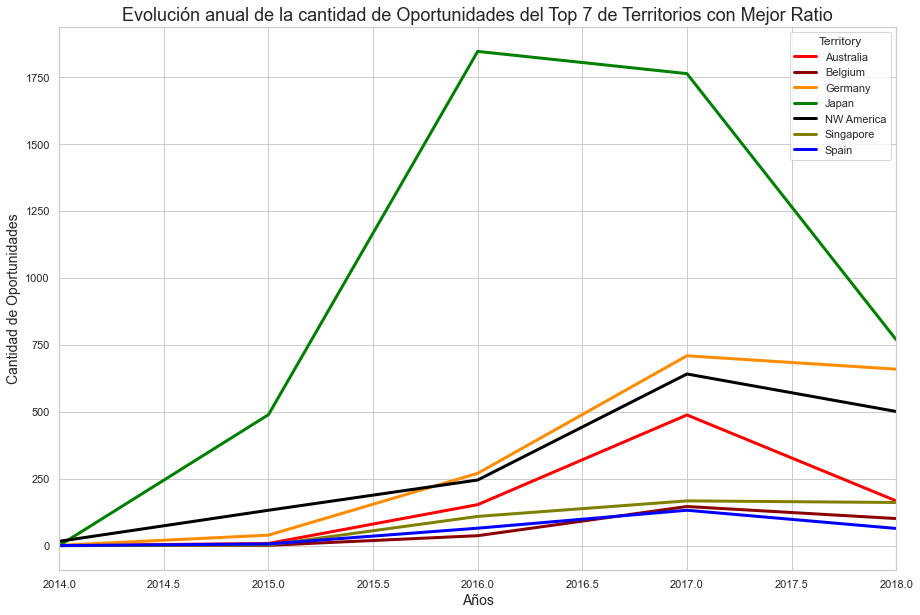

In [521]:
grafico=pd.pivot_table(top7_territorios, values='veces', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0).plot(figsize=(15,10),\
                color=['red','darkred','darkorange','green','black','olive','blue'],linewidth=3);
grafico.set_title("Evolución anual de la cantidad de Oportunidades del Top 7 de Territorios con Mejor Ratio",fontsize=18)
plt.xlim(2014,2018,1)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

* Los 7 Territorios con mejor Ratio y la evolución temporal de su ratio.

In [522]:
top7_territorios_year=pd.pivot_table(top7_territorios, values='veces', index=['Año_Oportunidad','Territory']\
               ,columns=['Stage'], aggfunc=np.sum, fill_value=0)

In [523]:
top7_territorios_year['Total_Oportunidades']=top7_territorios_year['Closed Lost'] + top7_territorios_year['Closed Won']
top7_territorios_year['Ratio_Oportunidades_exitosas'] = top7_territorios_year['Closed Won']/top7_territorios_year['Total_Oportunidades']
top7_territorios_year

Stage                       Closed Lost  Closed Won  Total_Oportunidades  \
Año_Oportunidad Territory                                                  
2014            Germany               0           1                    1   
                NW America            5          11                   16   
2015            Australia             7           1                    8   
                Belgium               1           0                    1   
                Germany              19          20                   39   
                Japan               353         136                  489   
                NW America           83          49                  132   
                Singapore             2           0                    2   
                Spain                 5           1                    6   
2016            Australia            31         122                  153   
                Belgium              14          23                   37   
                Germany             123         147                  270   
                Japan               898         948                 1846   
                NW America          120         125                  245   
                Singapore            35          74                  109   
                Spain                24          41                   65   
2017            Australia           183         305                  488   
                Belgium              46         100                  146   
                Germany             230         479                  709   
                Japan               198        1565                 1763   
                NW America          250         391                  641   
                Singapore            35         132                  167   
                Spain                30         102                  132   
2018            Australia            85          82                  167   
                Belgium              37          64                  101   
                Germany             287         372                  659   
                Japan                97         672                  769   
                NW America          129         372                  501   
                Singapore            12         149                  161   
                Spain                27          37                   64   

Stage                       Ratio_Oportunidades_exitosas  
Año_Oportunidad Territory                                 
2014            Germany                             1.00  
                NW America                          0.69  
2015            Australia                           0.12  
                Belgium                             0.00  
                Germany                             0.51  
                Japan                               0.28  
                NW America                          0.37  
                Singapore                           0.00  
                Spain                               0.17  
2016            Australia                           0.80  
                Belgium                             0.62  
                Germany                             0.54  
                Japan                               0.51  
                NW America                          0.51  
                Singapore                           0.68  
                Spain                               0.63  
2017            Australia                           0.62  
                Belgium                             0.68  
                Germany                             0.68  
                Japan                               0.89  
                NW America                          0.61  
                Singapore                           0.79  
                Spain                               0.77  
2018            Australia                           0.49  
                Belgium          

In [524]:
top7_territorios_year = top7_territorios_year.reset_index()
top7_territorios_year.tail(12)

Stage  Año_Oportunidad   Territory  Closed Lost  Closed Won  \
18                2017     Germany          230         479   
19                2017       Japan          198        1565   
20                2017  NW America          250         391   
21                2017   Singapore           35         132   
22                2017       Spain           30         102   
23                2018   Australia           85          82   
24                2018     Belgium           37          64   
25                2018     Germany          287         372   
26                2018       Japan           97         672   
27                2018  NW America          129         372   
28                2018   Singapore           12         149   
29                2018       Spain           27          37   

Stage  Total_Oportunidades  Ratio_Oportunidades_exitosas  
18                     709                          0.68  
19                    1763                          0.89  
20                     641                          0.61  
21                     167                          0.79  
22                     132                          0.77  
23                     167                          0.49  
24                     101                          0.63  
25                     659                          0.56  
26                     769                          0.87  
27                     501                          0.74  
28                     161                          0.93  
29                      64                          0.58

In [525]:
pd.pivot_table(top7_territorios_year, values='Ratio_Oportunidades_exitosas', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0)

Territory        Australia  Belgium  Germany  Japan  NW America  Singapore  \
Año_Oportunidad                                                              
2014                  0.00     0.00     1.00   0.00        0.69       0.00   
2015                  0.12     0.00     0.51   0.28        0.37       0.00   
2016                  0.80     0.62     0.54   0.51        0.51       0.68   
2017                  0.62     0.68     0.68   0.89        0.61       0.79   
2018                  0.49     0.63     0.56   0.87        0.74       0.93   

Territory        Spain  
Año_Oportunidad         
2014              0.00  
2015              0.17  
2016              0.63  
2017              0.77  
2018              0.58

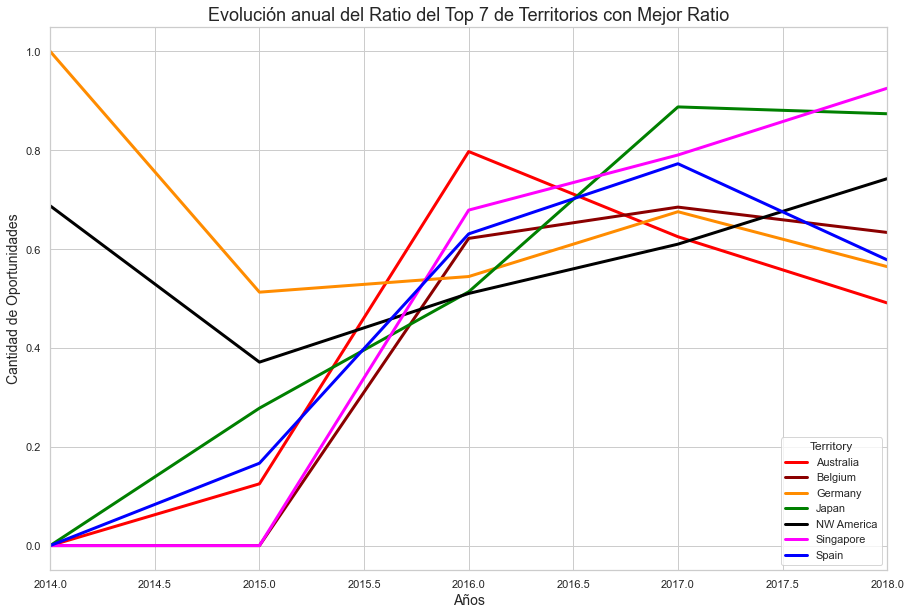

In [526]:
grafico=pd.pivot_table(top7_territorios_year, values='Ratio_Oportunidades_exitosas', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0).plot(figsize=(15,10),\
                color=['red','darkred','darkorange','green','black','magenta','blue'],linewidth=3);
grafico.set_title("Evolución anual del Ratio del Top 7 de Territorios con Mejor Ratio",fontsize=18)
plt.xlim(2014,2018,1)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

* Analizar grupo de Territorios por tramos de años

* Acá puedo analizar a los territorios en general y luego ver la influecia de los territorios en las regiones en función de casos exitosos y no exitosos. Luego analizar caso Japón

## 5. Estaciones del año

## 6. Toneladas de Refrigeración

In [17]:
### Ahora APAC Pasó de tener un 57,6% de oportunidades exitosas a tener 64,2% de oportunidades exitosas

## Territory

## Vendedores Responsables de la Oportunidad

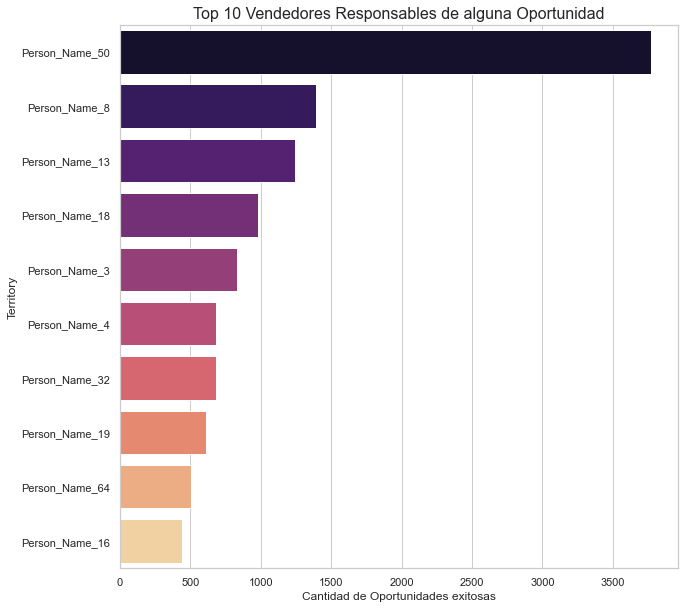

In [22]:
target = df['Opportunity_Owner'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de alguna Oportunidad",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Territory",fontsize=12);

In [23]:
exitosos=df.loc[df['Stage']=='Closed Won',['Opportunity_Owner']]
no_exitosos=df.loc[df['Stage']=='Closed Lost',['Opportunity_Owner']]

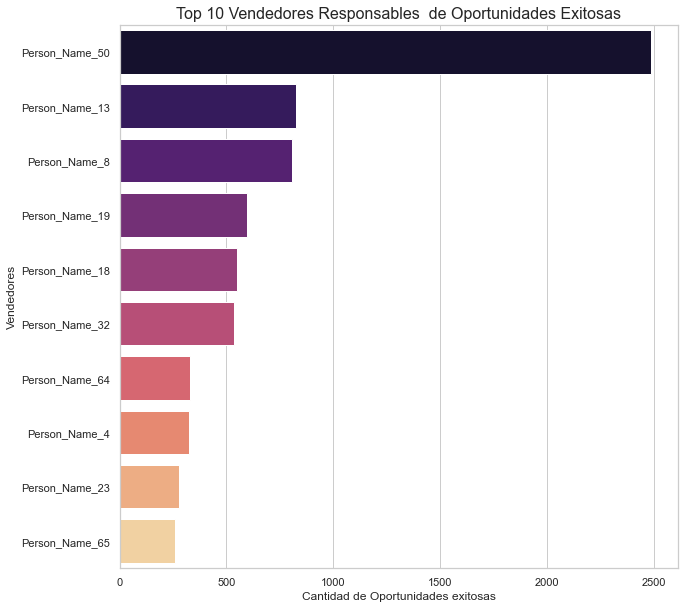

In [24]:
target = exitosos['Opportunity_Owner'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables  de Oportunidades Exitosas",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

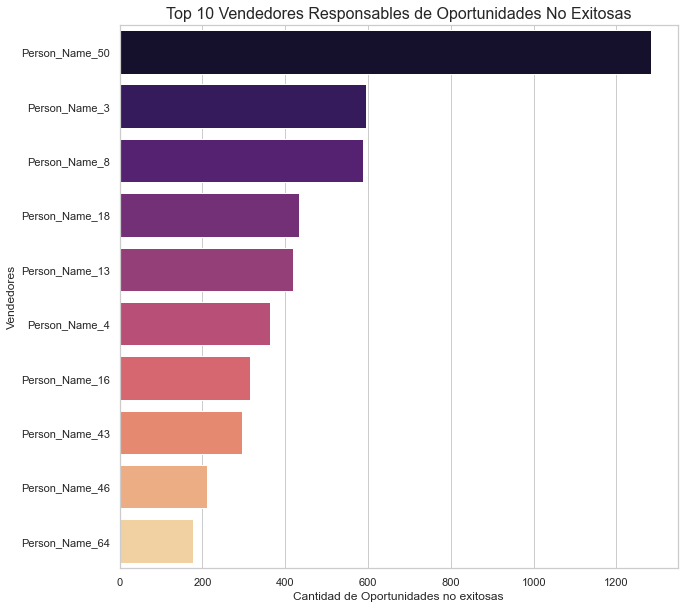

In [25]:
target = no_exitosos['Opportunity_Owner'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de Oportunidades No Exitosas",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades no exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

## Se observa con claridad que los vendedores a cargo de mas mayor cantidad de oportunidades de venta (poner aca ejemplos de algunos vendedores) son los que lideran los ránkings de mayor cantidad de ventas exitosas y no exitosas. Esto nos muestra que para sacar mejores conclusiones sobre dichos vendedores sería más conveniente realizar un análisis proporcional y con ciertas restricciones aplicadas y no quedarnos solamente con las cantidades absolutas de los datos.

#### Mejores y peores vendedores en terminos relativos. Además tomando en cuenta un filtrando cantidad de ventas >=10% del total de ventas de la empresa (318)

In [27]:
vendedores = df[['Opportunity_Owner','Stage']].copy()
vendedores['veces'] = 1
vendedores_oprtunidades=pd.crosstab(vendedores['Opportunity_Owner'], df['Stage'],values=vendedores.veces,aggfunc=np.sum).reset_index().copy()

In [28]:
vendedores_oprtunidades=vendedores_oprtunidades.fillna(0)
vendedores_oprtunidades['Total_ventas'] = vendedores_oprtunidades['Closed Lost']+ vendedores_oprtunidades['Closed Won']
vendedores_oprtunidades['Ratio_ventas_exitosas'] = vendedores_oprtunidades['Closed Won']/vendedores_oprtunidades['Total_ventas']*100
vendedores_oprtunidades.head()

Stage Opportunity_Owner  Closed Lost  Closed Won  Total_ventas  \
0         Person_Name_0          1.0         0.0           1.0   
1        Person_Name_10          2.0         0.0           2.0   
2        Person_Name_11         51.0        26.0          77.0   
3        Person_Name_12         16.0         7.0          23.0   
4        Person_Name_13        419.0       827.0        1246.0   

Stage  Ratio_ventas_exitosas  
0                   0.000000  
1                   0.000000  
2                  33.766234  
3                  30.434783  
4                  66.372392

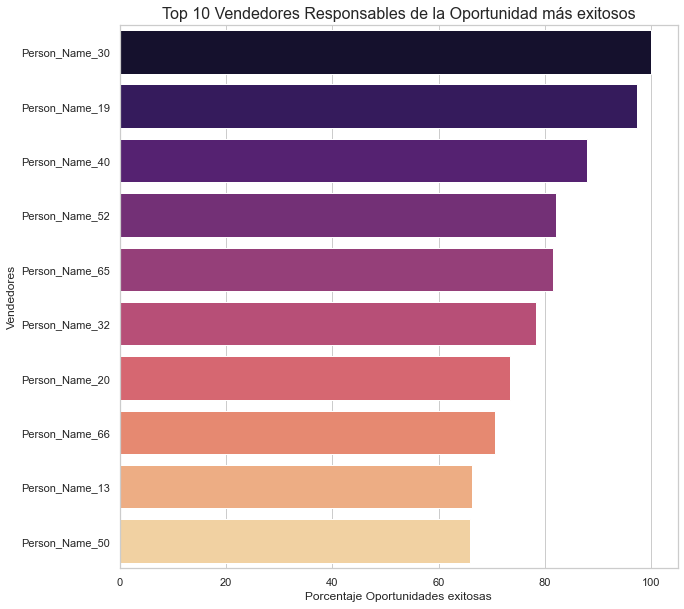

In [29]:
target = vendedores_oprtunidades.nlargest(10,'Ratio_ventas_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_ventas_exitosas,y=target.Opportunity_Owner,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad más exitosos",fontsize=16)
grafico_top_key.set_xlabel("Porcentaje Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

In [30]:
vendedores_oprtunidades.head()

Stage Opportunity_Owner  Closed Lost  Closed Won  Total_ventas  \
0         Person_Name_0          1.0         0.0           1.0   
1        Person_Name_10          2.0         0.0           2.0   
2        Person_Name_11         51.0        26.0          77.0   
3        Person_Name_12         16.0         7.0          23.0   
4        Person_Name_13        419.0       827.0        1246.0   

Stage  Ratio_ventas_exitosas  
0                   0.000000  
1                   0.000000  
2                  33.766234  
3                  30.434783  
4                  66.372392

In [31]:
vendedores_oprtunidades['Total_media_ventas_vendedor']=vendedores_oprtunidades['Total_ventas'].mean()

In [32]:
df.Submitted_for_Approval.value_counts()

0    16435
Name: Submitted_for_Approval, dtype: int64

#### Utilizando el filtro de total de ventas >=318

In [33]:
vendedores_oprtunidades=vendedores_oprtunidades.loc[vendedores_oprtunidades['Total_ventas']>=318]

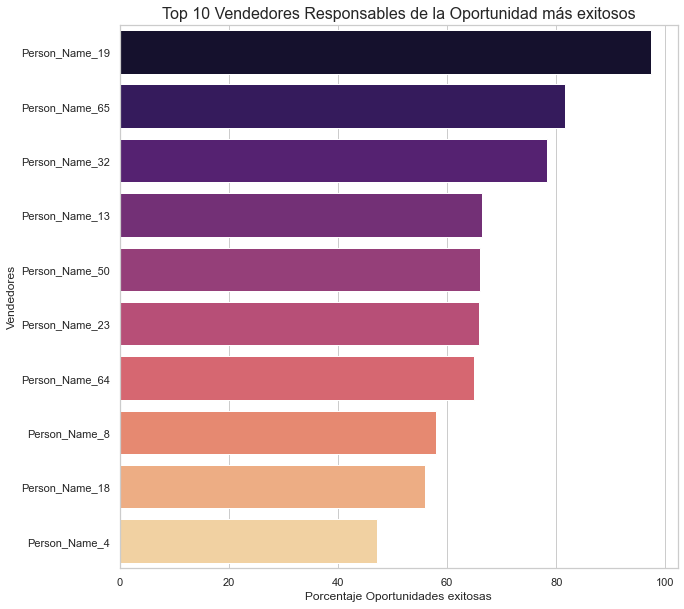

In [34]:
target = vendedores_oprtunidades.nlargest(10,'Ratio_ventas_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_ventas_exitosas,y=target.Opportunity_Owner,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad más exitosos",fontsize=16)
grafico_top_key.set_xlabel("Porcentaje Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

## 1) Hacer análisis de clientes que generan más y menos oportunidades luego sacar la proporcion de mejores clientes y peores. Luego ver la proporcion de mejores y peores por regón y comparar regiones.

## 2) Comom se distribuyen las oportunidades exitosas o no segun las estaciones de año? .Como cambian las proporciones de ventas exitosas para cada región según la estacion del año?

## 3) Relacion cliente vendedor. analizar top vendedores con mismos clientes y cantidades y top de distintos clientes para un cirto vendeor. Comparar regiones. Existe algún venderor que trabaja con clentes de distintas regiones? existen clientes que tienen pedidos de compra para varias regiones?

## 4) Cómo es el ratio de ventas exitosas? (ventas positivas/ total de oportunidades) a lo largo de los años?. Hacer todo esto poniendo en un mismo gráfico datos de ratio total y de ratio por Región.
## 5) Como evolucionan el precio de los 5 productos más populares? Realizar números índices para calcularlo y tomar año base conveniente.
## 6) Mismos clientes con varios casos cancelados, luego para un mismo pedido o para uno distinto cambio y fue venta positiva? lo mismo para casos que se tornaron negativ 

## 7) Análisis Estacional de las oportunidades:
*  a) Estacion del año de las oportunidades según la fecha de creación de la cuenta cliente. Osea: En que estaciones del año se crean más cuentas clientes?
* b) Repetir esto asignando la estación debida a la oportunidad para las demás fechas disponibles y en base a esto ver su relación con casos exitosos y no exitosos.

### Datos Temporales

In [42]:
df.loc[(df['Stage']=='Closed Won'),['ID','Opportunity_ID','Stage','Account_Created_Date'\
,'Opportunity_Created_Date','Last_Activity','Quote_Expiry_Date','Last_Modified_Date','Planned_Delivery_Start_Date','Planned_Delivery_End_Date'\
,'Actual_Delivery_Date']].head(10)

ID  Opportunity_ID       Stage Account_Created_Date  \
1   27760               1  Closed Won            6/16/2015   
2   27446               2  Closed Won            4/21/2015   
7   27455               7  Closed Won            4/21/2015   
23  28524              11  Closed Won           10/13/2015   
63  13392              20  Closed Won            7/27/2013   
64  19342              21  Closed Won            8/22/2013   
65  24444              22  Closed Won            4/20/2015   
66  18491              23  Closed Won             1/8/2014   
67  18494              24  Closed Won             1/8/2014   
70  19680              27  Closed Won            7/27/2013   

   Opportunity_Created_Date Last_Activity Quote_Expiry_Date  \
1                 12/7/2015           NaT         1/20/2016   
2                 12/8/2015           NaT         9/30/2016   
7                 12/9/2015           NaT          1/7/2016   
23                12/9/2015           NaT         3/31/2016   
63                12/9/2015           NaT          1/8/2016   
64               12/10/2015           NaT               NaT   
65               12/10/2015           NaT          1/5/2016   
66               12/10/2015           NaT        12/15/2015   
67               12/10/2015           NaT        12/16/2015   
70               12/12/2015           NaT        12/15/2015   

   Last_Modified_Date Planned_Delivery_Start_Date Planned_Delivery_End_Date  \
1           1/15/2016                   1/18/2016                 1/20/2016   
2           9/29/2016                   1/25/2016                 1/25/2016   
7           12/9/2015                   1/25/2016                 1/25/2016   
23           1/7/2016                    1/9/2016                 1/15/2016   
63          12/9/2015                   1/18/2016                 1/29/2016   
64          2/22/2017                    3/1/2016                 3/31/2016   
65           1/5/2016                    1/8/2016                  1/8/2016   
66          1/12/2017                    1/8/2016                 1/12/2016   
67          1/12/2017                   1/15/2016                 1/19/2016   
70          1/12/2017                   1/26/2016                 1/29/2016   

   Actual_Delivery_Date  
1                   NaT  
2                   NaT  
7                   NaT  
23                  NaT  
63                  NaT  
64                  NaT  
65                  NaT  
66                  NaT  
67                  NaT  
70                  NaT

In [53]:
df_p = pd.DataFrame({'name': ['Japan', 'India', 'Italy', 'Germany',
       'United Kingdom','Egypt']})

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="2.0.0")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df_p['location'] = df_p['name'].apply(geocode)

df_p['point'] = df_p['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [54]:
df_p.head()

name                                    location  \
0           Japan             (日本, (36.5748441, 139.2394179))   
1           India           (India, (22.3511148, 78.6677428))   
2           Italy           (Italia, (42.6384261, 12.674297))   
3         Germany     (Deutschland, (51.0834196, 10.4234469))   
4  United Kingdom  (United Kingdom, (54.7023545, -3.2765753))   

                            point  
0  (36.5748441, 139.2394179, 0.0)  
1   (22.3511148, 78.6677428, 0.0)  
2    (42.6384261, 12.674297, 0.0)  
3   (51.0834196, 10.4234469, 0.0)  
4   (54.7023545, -3.2765753, 0.0)

In [66]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="2.0.0")

#from geopy.extra.rate_limiter import RateLimiter
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
#df_terr['location'] = df_terr['Territory'].apply(geocode)

#df_terr['point'] = df_terr['location'].apply(lambda loc: tuple(loc.point) if loc else None)

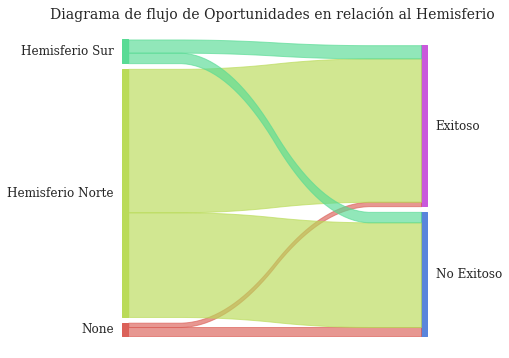

In [95]:
df['Oportunidad']= '' 
df.loc[df['Stage']== 'Closed Won','Oportunidad']= 'Exitoso'
df.loc[df['Stage']== 'Closed Lost','Oportunidad']= 'No Exitoso'
from pySankey import sankey
#display('Diagrama de flujo de KeyWors Globales en relacion a la veracidad de los Tweets')
sankey.sankey(df['Hemisferio'],df['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación al Hemisferio ',fontsize=14);

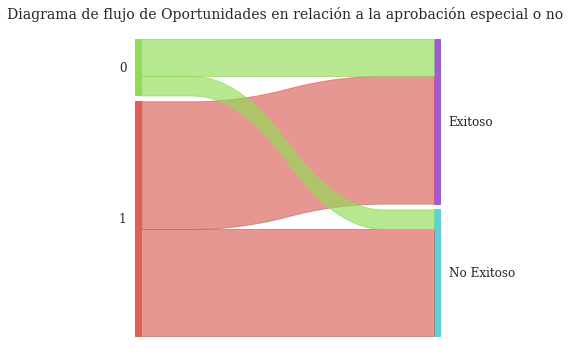

In [73]:
df['Oportunidad']= '' 
df.loc[df['Stage']== 'Closed Won','Oportunidad']= 'Exitoso'
df.loc[df['Stage']== 'Closed Lost','Oportunidad']= 'No Exitoso'
from pySankey import sankey
#display('Diagrama de flujo de KeyWors Globales en relacion a la veracidad de los Tweets')
sankey.sankey(df['Pricing, Delivery_Terms_Quote_Appr'],df['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación a la aprobación especial o no ',fontsize=14);

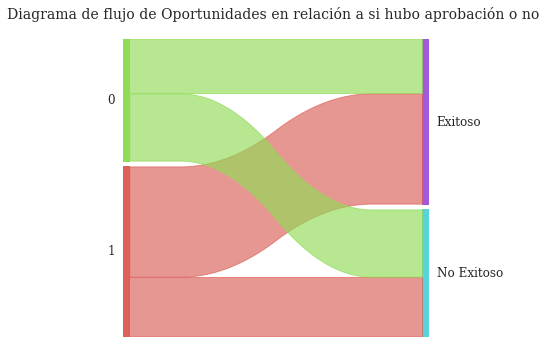

In [74]:
df['Oportunidad']= '' 
df.loc[df['Stage']== 'Closed Won','Oportunidad']= 'Exitoso'
df.loc[df['Stage']== 'Closed Lost','Oportunidad']= 'No Exitoso'
from pySankey import sankey
#display('Diagrama de flujo de KeyWors Globales en relacion a la veracidad de los Tweets')
sankey.sankey(df['Pricing, Delivery_Terms_Approved'],df['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación a si hubo aprobación o no ',fontsize=14);

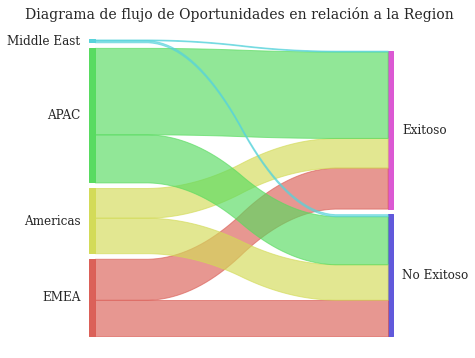

In [76]:
df['Oportunidad']= '' 
df.loc[df['Stage']== 'Closed Won','Oportunidad']= 'Exitoso'
df.loc[df['Stage']== 'Closed Lost','Oportunidad']= 'No Exitoso'
from pySankey import sankey
#display('Diagrama de flujo de KeyWors Globales en relacion a la veracidad de los Tweets')
sankey.sankey(df['Region'],df['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación a la Region ',fontsize=14);

In [58]:
df.Opportunity_ID.value_counts()

12460    36
2008     36
6606     26
5123     26
2911     24
         ..
5419      1
9517      1
3384      1
1337      1
0         1
Name: Opportunity_ID, Length: 9791, dtype: int64

In [59]:
df.shape

(16883, 53)

In [60]:
df['es_duplicado']=df.duplicated(subset=['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount', 'Stage',
       'Prod_Category_A'])

In [63]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [302]:
duplicados=df.loc[df['es_duplicado']==True,:].sort_values('Opportunity_ID')

In [305]:
duplicados.tail(10)

ID Region  Territory  Pricing, Delivery_Terms_Quote_Appr  \
15760  11782   APAC  Australia                                   1   
15763  11744   APAC  Australia                                   1   
15765  11755   APAC  Australia                                   1   
15766  11760   APAC  Australia                                   1   
15818  18170   APAC  Australia                                   0   
15820  18176   APAC  Australia                                   0   
15851   6935   APAC  Australia                                   1   
15852   6940   APAC  Australia                                   1   
15932  12459   APAC  Australia                                   1   
15933  12476   APAC  Australia                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
15760                                 1                             1   
15763                                 1                             1   
15765                                 1                             1   
15766                                 1                             1   
15818                                 0                             0   
15820                                 0                             0   
15851                                 1                             1   
15852                                 1                             1   
15932                                 1                             1   
15933                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
15760                             1                       0   
15763                             1                       0   
15765                             1                       0   
15766                             1                       0   
15818                             0                       0   
15820                             0                       0   
15851                             1                       0   
15852                             1                       0   
15932                             1                       0   
15933                             1                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
15760  Bureaucratic_Code_4            9/28/2016  ...                  NaT   0   
15763  Bureaucratic_Code_4            9/28/2016  ...                  NaT   0   
15765  Bureaucratic_Code_4            9/28/2016  ...                  NaT   0   
15766  Bureaucratic_Code_4            9/28/2016  ...                  NaT   0   
15818  Bureaucratic_Code_4            7/28/2013  ...                  NaT   0   
15820  Bureaucratic_Code_4            7/28/2013  ...                  NaT   0   
15851  Bureaucratic_Code_4            8/22/2018  ...                  NaT   0   
15852  Bureaucratic_Code_4            8/22/2018  ...                  NaT   0   
15932  Bureaucratic_Code_4            9/28/2016  ...                  NaT   0   
15933  Bureaucratic_Code_4            9/28/2016  ...                  NaT   0   

      Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
15760                   USD      72817.8                            USD   
15763                   USD      72817.8                            USD   
15765                   USD      72817.8                            USD   
15766                   USD      72817.8                            USD   
15818                   USD     133887.6                            USD   
15820                   USD     131762.4                            USD   
15851                   USD      71780.8                            USD   
15852                   USD      71780.8                            USD   
15932                   USD      82555.2                            USD   
15933                   USD      82555.2                            USD   

      Total_Taxable_Amo

In [309]:
duplicados[['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',\
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',\
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',\
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',\
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',\
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner']]

Region       Territory  Pricing, Delivery_Terms_Quote_Appr  \
737        APAC           Japan                                   1   
1291       EMEA         Austria                                   1   
2302       EMEA  United Kingdom                                   1   
2688   Americas      NW America                                   1   
4229       APAC       Australia                                   1   
...         ...             ...                                 ...   
15820      APAC       Australia                                   0   
15851      APAC       Australia                                   1   
15852      APAC       Australia                                   1   
15932      APAC       Australia                                   1   
15933      APAC       Australia                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
737                                   1                             1   
1291                                  1                             0   
2302                                  1                             1   
2688                                  0                             1   
4229                                  1                             1   
...                                 ...                           ...   
15820                                 0                             0   
15851                                 1                             1   
15852                                 1                             1   
15932                                 1                             1   
15933                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
737                               1                       0   
1291                              0                       0   
2302                              1                       0   
2688                              0                       0   
4229                              1                       0   
...                             ...                     ...   
15820                             0                       0   
15851                             1                       0   
15852                             1                       0   
15932                             1                       0   
15933                             1                       0   

         Bureaucratic_Code Account_Created_Date    Source  Billing_Country  \
737    Bureaucratic_Code_4           10/30/2015       None           Japan   
1291   Bureaucratic_Code_4           12/17/2015       None         Austria   
2302   Bureaucratic_Code_4            6/16/2014       None         Germany   
2688   Bureaucratic_Code_5            4/28/2016   Source_7   United States   
4229   Bureaucratic_Code_4            10/3/2013       None       Australia   
...                    ...                  ...        ...             ...   
15820  Bureaucratic_Code_4            7/28/2013       None       Australia   
15851  Bureaucratic_Code_4            8/22/2018  Source_13       Australia   
15852  Bureaucratic_Code_4            8/22/2018  Source_13       Australia   
15932  Bureaucratic_Code_4            9/28/2016       None       Australia   
15933  Bureaucratic_Code_4            9/28/2016       None       Australia   

            Account_Name        Opportunity_Name  Opportunity_ID  \
737     Account_Name_501   Opportunity_Name_4267             352   
1291    Account_Name_686   Opportunity_Name_9745             743   
2302    Account_Name_404   Opportunity_Name_9168            1296   
2688    Account_Name_887    Opportunity_Name_460            1489   
4229   Account_Name_1440  Opportunity_Name_10122            2443   
...                  ...                     ...             ...   
15820  Account_Name_1440  Opportunity_Name_10112           10268   
15851  Account_Name_1613  Opportunity_Nam

In [ ]:
to_csv()

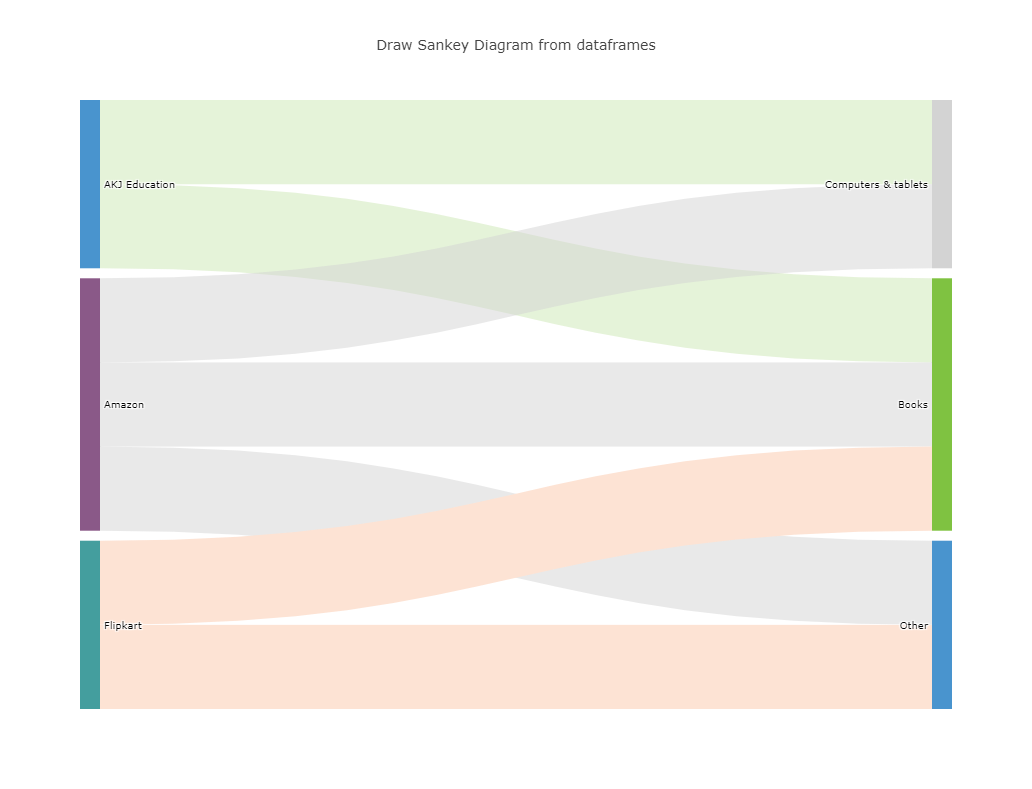

In [62]:
# imports
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Nodes & links
nodes = [['ID', 'Label', 'Color'],
        [0,'AKJ Education','#4994CE'],
        [1,'Amazon','#8A5988'],
        [2,'Flipkart','#449E9E'],
        [3,'Books','#7FC241'],
        [4,'Computers & tablets','#D3D3D3'],
        [5,'Other','#4994CE'],]

# links with your data
links = [['Source','Target','Value','Link Color'],

        # AKJ
        [0,3,1,'rgba(127, 194, 65, 0.2)'],
        [0,4,1,'rgba(127, 194, 65, 0.2)'],

        # Amazon
        [1,3,1,'rgba(211, 211, 211, 0.5)'],
        [1,4,1,'rgba(211, 211, 211, 0.5)'],
        [1,5,1,'rgba(211, 211, 211, 0.5)'],

        # Flipkart
        [2,5,1,'rgba(253, 227, 212, 1)'],
        [2,3,1,'rgba(253, 227, 212, 1)'],]

# links with some data for illustrative purposes ################
#links = [
#    ['Source','Target','Value','Link Color'],
#    
#    # AKJ
#    [0,3,846888,'rgba(127, 194, 65, 0.2)'],
#    [0,4,1045,'rgba(127, 194, 65, 0.2)'],
#    
#    # Amazon
#    [1,3,1294423,'rgba(211, 211, 211, 0.5)'],
#    [1,4,42165,'rgba(211, 211, 211, 0.5)'],
#    [1,5,415,'rgba(211, 211, 211, 0.5)'],
#    
#    # Flipkart
#    [2,5,1,'rgba(253, 227, 212, 1)'],]
#################################################################


# Retrieve headers and build dataframes
nodes_headers = nodes.pop(0)
links_headers = links.pop(0)
df_nodes = pd.DataFrame(nodes, columns = nodes_headers)
df_links = pd.DataFrame(links, columns = links_headers)

# Sankey plot setup
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
    # thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  df_nodes['Label'].dropna(axis=0, how='any'),
      color = df_nodes['Color']
    ),
    link = dict(
      source = df_links['Source'].dropna(axis=0, how='any'),
      target = df_links['Target'].dropna(axis=0, how='any'),
      value = df_links['Value'].dropna(axis=0, how='any'),
      color = df_links['Link Color'].dropna(axis=0, how='any'),
  )
)

layout = dict(
        title = "Draw Sankey Diagram from dataframes",
    height = 772,
    font = dict(
      size = 10),)

fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)

In [6]:
print("hola mundo")

hola mundo


In [7]:
7*8

56

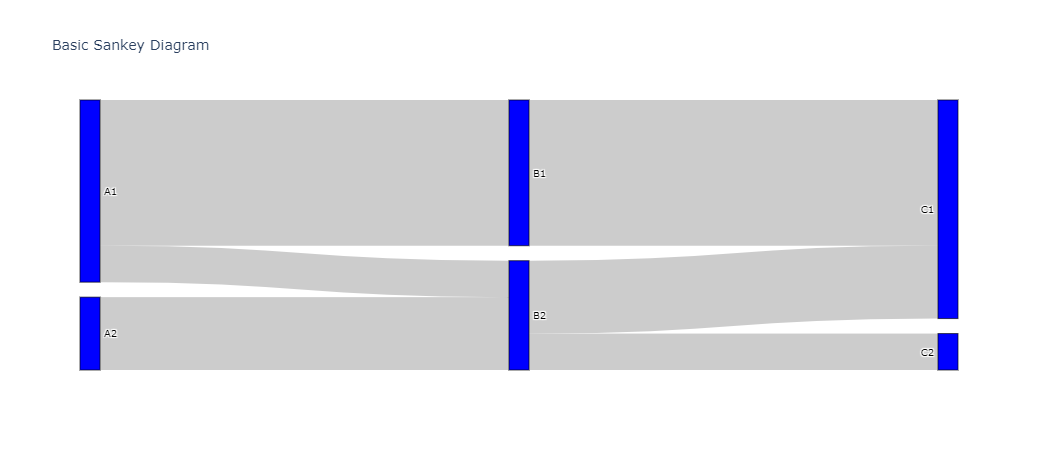

In [1]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()